# Lower Bounds

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

def lower_bound_categorical(k, n=1000, epsilon=0.01):
    """Compute the lower bound to Pe for the binary valued cost function case.

    BOP is a categorical variable.
    """
    d = 2 ** k
    m = n / d
    parenthesis_term = ( 1 + 4 * epsilon ** 2)**(m/2)
    frac_term = 1 / np.sqrt(d)
    return 1 - frac_term * parenthesis_term

def lower_bound_normal(k, n=1000, epsilon=0.01, sigma=1):
    """Compute the lower bound to Pe for the real-valued cost function case.

    BOP is (approximated as) a normal variable.
    """
    d = 2 ** k
    m = n / d
    exp_term = np.exp( (m*epsilon**2) / (2 * sigma**2))
    frac_term = 1 / (2 * np.sqrt(d))
    return 1 - frac_term * exp_term

# Plots

In [2]:
k_values = np.arange(0, 21)

sigma_values = [0.01, 0.1, 0.5, 1, 10]
fontsize = 16

def plot_lower_bound_categorical(ax, n):    
    lower_bound_values = lower_bound_categorical(k_values, n=n)
    ax.plot(k_values, lower_bound_values)
    
    ax.axhline(y=0.5, c="black", linestyle="--", label="Pe = 0.5")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("Pe", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error Pe for n={n}", fontsize=fontsize)
    ax.legend(fontsize=10)

def plot_lower_bound_normal(ax, n):
    # Choose a colormap, e.g., viridis, and normalize it
    colormap = plt.get_cmap('viridis', len(sigma_values))
    norm = plt.Normalize(min(np.log(sigma_values)), max(np.log(sigma_values)))
    
    for sigma in sigma_values: 
        lower_bound_values = lower_bound_normal(k_values, sigma=sigma, n=n)
        color = colormap(norm(np.log(sigma)))
        ax.plot(k_values, lower_bound_values, label=f"sigma={sigma}", color=color)
    
    ax.axhline(y=0.5, c="black", linestyle="--", label="Pe = 0.5")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("Pe", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error Pe for n={n}", fontsize=fontsize)
    ax.legend(fontsize=10)

## Plot for lower bound categorical variable

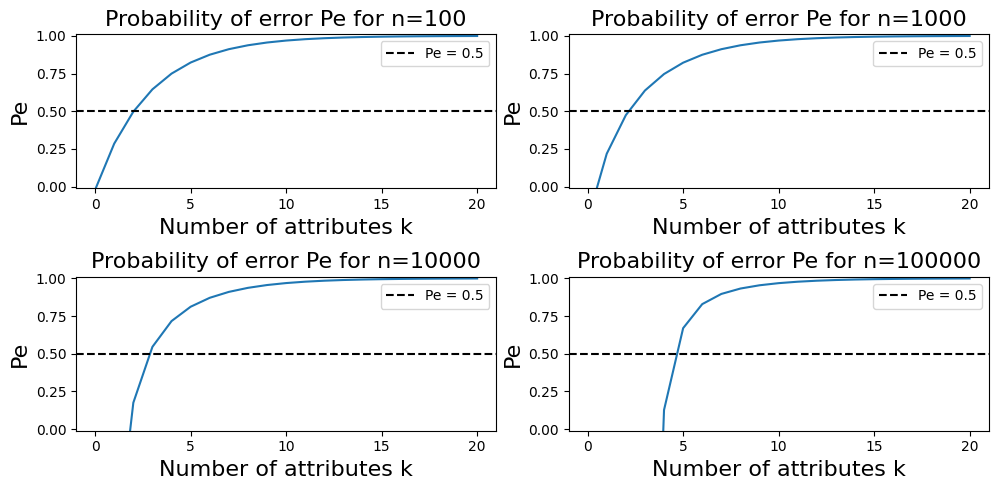

In [3]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot for n=100, n=1000, and n=10000 on separate subplots
n_values = [100, 1000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]
for i in range(2):
    for j in range(2):
        n = n_values[2*i + j]
        plot_lower_bound_categorical(axes[i, j], n)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Plot for lower bound normal variable

/var/folders/dz/k1hb2xr94k558sjs416njdp40000gn/T/ipykernel_26791/785909984.py:23: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp( (m*epsilon**2) / (2 * sigma**2))


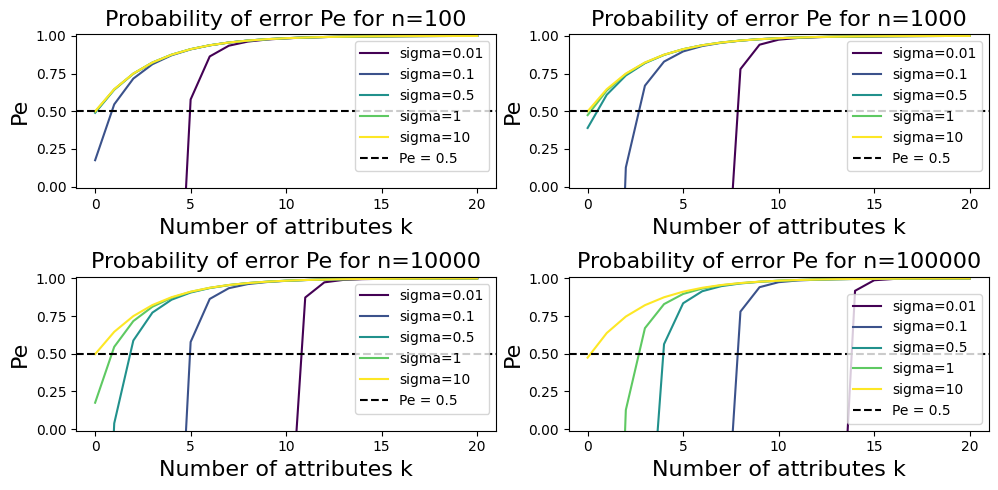

In [4]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot for n=100, n=1000, and n=10000 on separate subplots
n_values = [100, 1000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]
for i in range(2):
    for j in range(2):
        n = n_values[2*i + j]
        plot_lower_bound_normal(axes[i, j], n)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()